# Trying to model ignition delay from LLNL for Iso-octane


In [1]:
import cantera as ct
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
ct.__version__

'2.4.0'

In [3]:
# from cantera import ck2cti
# ck2cti.main([
#     '--input=/home/ajulu.c/Code/GTL/ic8/ic8_ver3_mech.txt',
#     '--thermo=/home/ajulu.c/Code/GTL/ic8/prf_icv3_therm_dat.txt',
#     '--output=/home/ajulu.c/Code/GTL/ic8/ic8_ver3_mech.cti',
#     '--permissive'
#         ])

In [5]:
gas = ct.Solution('/scratch/ajulu.c/Code/GTL/ic8/ic8_ver3_mech.cti')



**** WARNING ****
For species EC6H13O2, discontinuity in s/R detected at Tmid = 1388
	Value computed using low-temperature polynomial:  107.806
	Value computed using high-temperature polynomial: 107.116


In [6]:
sorted(gas.species_names)

['A-AC5H10O',
 'A-AC6H12O',
 'A-BC5H10O',
 'A-BC6H12O',
 'A-CC5H10O',
 'A-CC6H12O',
 'A-DC5H10O',
 'A-DC6H12O',
 'A-EC6H12O',
 'AC3H4CH2CHO',
 'AC3H4CH2COCH3',
 'AC3H4COC2H5',
 'AC3H4COCH3',
 'AC3H5CHCHO',
 'AC3H5CHCOCH3',
 'AC3H5CHO',
 'AC3H5CO',
 'AC3H5OOH',
 'AC5H10',
 'AC5H10CHO',
 'AC5H10OH',
 'AC5H10OOH-A',
 'AC5H10OOH-AO2',
 'AC5H10OOH-B',
 'AC5H10OOH-BO2',
 'AC5H10OOH-C',
 'AC5H10OOH-CO2',
 'AC5H10OOH-D',
 'AC5H10OOH-DO2',
 'AC5H11',
 'AC5H11O',
 'AC5H11O2',
 'AC5H11O2H',
 'AC5H9-A1',
 'AC5H9-A2',
 'AC5H9-C',
 'AC5H9-D',
 'AC5H9O-A2',
 'AC5H9O-C',
 'AC6H11-A2',
 'AC6H11-C',
 'AC6H11-D',
 'AC6H11-E',
 'AC6H11O-C',
 'AC6H12',
 'AC6H12CHO-B',
 'AC6H12CHO-D',
 'AC6H12OH',
 'AC6H12OOH-A',
 'AC6H12OOH-AO2',
 'AC6H12OOH-B',
 'AC6H12OOH-BO2',
 'AC6H12OOH-C',
 'AC6H12OOH-CO2',
 'AC6H12OOH-D',
 'AC6H12OOH-DO2',
 'AC6H12OOH-E',
 'AC6H12OOH-EO2',
 'AC6H13',
 'AC6H13O',
 'AC6H13O2',
 'AC6H13O2H',
 'AC8H16OOH-A',
 'AC8H16OOH-AO2',
 'AC8H16OOH-B',
 'AC8H16OOH-BO2',
 'AC8H16OOH-C',
 'AC8H16OOH

In [7]:
print("The number of reactions is {}".format(len(gas.reactions())))
print("The number of species is {}".format(len(gas.species())))

The number of reactions is 6864
The number of species is 874


In [8]:
gas.TP = 900, 16e5
gas.set_equivalence_ratio(phi=1.0, fuel='IC8H18', oxidizer='O2:0.2, N2:0.8' )
gas()



  gas:

       temperature             900  K
          pressure         1.6e+06  Pa
           density         6.44783  kg/m^3
  mean mol. weight         30.1557  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy      5.8605e+05        1.767e+07     J
   internal energy       3.379e+05        1.019e+07     J
           entropy          7224.3        2.179e+05     J/K
    Gibbs function     -5.9158e+06       -1.784e+08     J
 heat capacity c_p          1282.7        3.868e+04     J/K
 heat capacity c_v            1007        3.037e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                O2        0.19685         0.208881          -25.141
                N2       0.787402         0.731465         -22.0657
            IC8H18       0.015748         0.059654         -96.2911
     [ +871 minor]          

In [9]:
def set_gas_concentrations(gas, phi):
    """
    Set the concentrations in the gas according to the description
    in the paper by 
    """
    # Set it to desired stoichiometry with synthetic air (20% O2 : 80% N2)
    gas.set_equivalence_ratio(phi=1.0, fuel='IC8H18', oxidizer='O2:0.2, N2:0.8' )
    # Then dilute the whole thing 1:2 with extra N2
    X = gas.X / 3.0 
    X[gas.species_index('N2')] += 2./3.
    gas.X = X

set_gas_concentrations(gas, 1.0)
gas()


  gas:

       temperature             900  K
          pressure     1.67954e+06  Pa
           density         6.44783  kg/m^3
  mean mol. weight         28.7276  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy      6.2797e+05        1.804e+07     J
   internal energy      3.6749e+05        1.056e+07     J
           entropy          7219.3        2.074e+05     J/K
    Gibbs function     -5.8694e+06       -1.686e+08     J
 heat capacity c_p          1194.5        3.431e+04     J/K
 heat capacity c_v          905.05          2.6e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                O2      0.0656168        0.0730886         -26.1911
                N2       0.929134         0.906038         -21.8517
            IC8H18     0.00524934        0.0208732         -97.3412
     [ +871 minor]          

In [10]:
# time in microseconds          relative pressure
pressure_profile = """0		                       1.000
50		                       1.004
250		                       1.027
450		                       1.046
650		                       1.062
850		                       1.072
1050	                       1.088
1250	                       1.101
1450	                       1.127
1650	                       1.157
1850	                       1.170
2050	                       1.160
2250	                       1.152
2450	                       1.153
2650	                       1.148
2850	                       1.143
3050	                       1.139
3250	                       1.136
3450	                       1.140
3650	                       1.142
3850	                       1.142
4050	                       1.153
4250	                       1.161
4450	                       1.168
4650	                       1.165
4850	                       1.166
5050	                       1.168
5250	                       1.170
5450	                       1.172
5650	                       1.175
5850	                       1.175
6050	                       1.178
6250	                       1.181
6450	                       1.184
6650	                       1.187
6850	                       1.189
7050	                       1.189
7250	                       1.188
7450	                       1.188
7650	                       1.190
7850	                       1.192
8000	                       1.192
10000	                       1.192
"""
times = []
pressures = []
for l in pressure_profile.splitlines():
    time, pressure = l.split()
    times.append((float(time)/1e6))
    pressures.append(float(pressure))
times = np.array(times)
pressures = np.array(pressures)
times, pressures

(array([0.00e+00, 5.00e-05, 2.50e-04, 4.50e-04, 6.50e-04, 8.50e-04,
        1.05e-03, 1.25e-03, 1.45e-03, 1.65e-03, 1.85e-03, 2.05e-03,
        2.25e-03, 2.45e-03, 2.65e-03, 2.85e-03, 3.05e-03, 3.25e-03,
        3.45e-03, 3.65e-03, 3.85e-03, 4.05e-03, 4.25e-03, 4.45e-03,
        4.65e-03, 4.85e-03, 5.05e-03, 5.25e-03, 5.45e-03, 5.65e-03,
        5.85e-03, 6.05e-03, 6.25e-03, 6.45e-03, 6.65e-03, 6.85e-03,
        7.05e-03, 7.25e-03, 7.45e-03, 7.65e-03, 7.85e-03, 8.00e-03,
        1.00e-02]),
 array([1.   , 1.004, 1.027, 1.046, 1.062, 1.072, 1.088, 1.101, 1.127,
        1.157, 1.17 , 1.16 , 1.152, 1.153, 1.148, 1.143, 1.139, 1.136,
        1.14 , 1.142, 1.142, 1.153, 1.161, 1.168, 1.165, 1.166, 1.168,
        1.17 , 1.172, 1.175, 1.175, 1.178, 1.181, 1.184, 1.187, 1.189,
        1.189, 1.188, 1.188, 1.19 , 1.192, 1.192, 1.192]))

In [9]:
"""
Calculate an array of relative volumes, to correspond
to the array of relative pressures given by `pressures`
assuming isentropic compression/expansion.
"""

initial_pressure = 16e5
gas.TP = 900, initial_pressure
initial_entropy = gas.entropy_mass
initial_density = gas.density
initial_volume = 1.0
volumes = np.ones_like(pressures)

for i, p in enumerate(pressures):
    gas.SP = initial_entropy, p*initial_pressure
    volumes[i] = initial_volume*initial_density/gas.density
volumes



array([1.        , 0.99697973, 0.9800115 , 0.96648561, 0.955423  ,
       0.94865514, 0.93805239, 0.92963568, 0.91331114, 0.89527235,
       0.88770651, 0.89351326, 0.89822189, 0.8976302 , 0.90059765,
       0.90358772, 0.90599625, 0.90781234, 0.90539273, 0.90418847,
       0.90418847, 0.8976302 , 0.89292866, 0.88886092, 0.89059902,
       0.89001879, 0.88886092, 0.88770651, 0.88655553, 0.88483547,
       0.88483547, 0.88312306, 0.88141823, 0.87972094, 0.87803113,
       0.87690873, 0.87690873, 0.87746952, 0.87746952, 0.87634876,
       0.87523128, 0.87523128, 0.87523128])

Text(0.5, 1.0, 'Plot of Volume against time in simulated shock tube (RCM)')

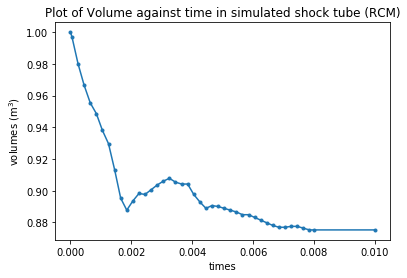

In [10]:
plt.plot(times, volumes, '.-')
plt.xlabel('times')
plt.ylabel('volumes (m$^3$)')
plt.title('Plot of Volume against time in simulated shock tube (RCM)')

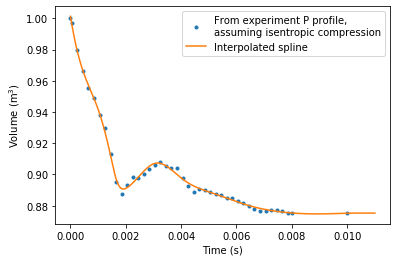

In [11]:
import scipy.interpolate
spl = scipy.interpolate.UnivariateSpline(times, volumes, k=3,s=0.0001, ext='const')
# if ext='const', extrapolation return the boundary value.

plt.plot(times, volumes, '.', label="From experiment P profile,\nassuming isentropic compression")
t = np.linspace(0,max(times)*1.1,1000)
plt.plot(t, spl(t), label="Interpolated spline")
plt.xlabel('Time (s)')
plt.ylabel('Volume (m$^3$)')
plt.legend(loc='best')

3
1


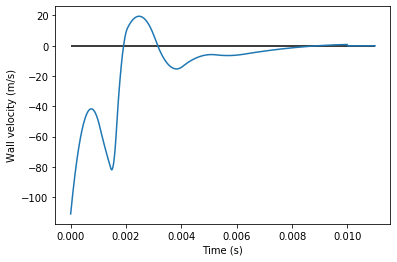

In [12]:
velocity = spl.derivative(n=1)
print(velocity.ext)
velocity.ext=1 # zeros
print(velocity.ext)
plt.plot(t, velocity(t))
plt.xlabel('Time (s)')
plt.ylabel('Wall velocity (m/s)')
plt.hlines(0,0,max(t))

Text(0.5, 1.0, 'Extrapolated to 0.1 s')

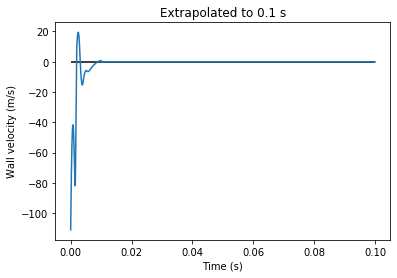

In [13]:
plt.plot(np.append(t,0.1), velocity(np.append(t,0.1)))
plt.xlabel('Time (s)')
plt.ylabel('Wall velocity (m/s)')
plt.hlines(0,0,0.1)
plt.title("Extrapolated to 0.1 s")

In [11]:
# def get_ignition_delay(gas, temperature, pressure_bar, mole_fractions, plot=False):
#     """
#     A general function to find the igniton delay.
#     Using C2H + O --> CH* as the indication of ignition
    
#     gas is a cantera Solution object
#     temperature in K
#     pressure_bar is in bar
#     mole_fractions is a dict
#     """
#     gas.TPX = temperature, pressure_bar*1e5, mole_fractions

    
#     reactor = ct.IdealGasReactor(gas)
#     environment = ct.Reservoir(ct.Solution('air.xml'))
    
#     ct.Wall(reactor, environment, A=1.0, velocity=velocity)
#     reactor_network = ct.ReactorNet([reactor])
    
#     time = 0.0
#     end_time = 100e-3
    
#     times = []
#     concentrations = []
#     pressures = []
#     temperatures = []
#     volumes = []
    
    
#     print_data = True
#     while time < end_time:
#         time = reactor_network.time
#         times.append(time)
#         temperatures.append(reactor.T)
#         pressures.append(reactor.thermo.P)
#         volumes.append(reactor.volume)
#         concentrations.append(reactor.thermo.concentrations)
#         # take a timestep
#         # the size of the step will be determined by the ODE solver
#         # depending on how quickly things are changing.
#         reactor_network.step()
    
#     print("Reached end time {0:.2f} ms in {1} steps".format(times[-1]*1e3, len(times)))
#     # convert the lists into arrays
#     concentrations = np.array(concentrations)
#     times = np.array(times)
#     pressures = np.array(pressures)
#     temperatures = np.array(temperatures)
#     volumes = np.array(volumes)
    
#     if plot:
#         plt.plot(times*1e3, volumes)
#         plt.xlabel("Time (ms)")
#         plt.ylabel("Volumes m$^3$")
#         plt.tight_layout()
#         plt.show()
        

#     if plot:
#         plt.subplot(2,1,1)
#         plt.plot(times*1e3, pressures/1e5)
#         plt.ylabel("Pressure (bar)", color='b')
#         ax2 = plt.gca().twinx()
#         ax2.set_ylabel('Temperature (K)', color='r')
#         ax2.plot(times*1e3, temperatures, 'r')
#     # Using C2H + O --> CH* as the indication of ignition
#     i_c2h = gas.species_index('C2H')   
#     i_o = gas.species_index('O')
#     excited_ch_generation = concentrations[:,i_o] * concentrations[:,i_c2h]
#     if plot:
#         plt.subplot(2,1,2)
#         plt.plot(times*1e3, excited_ch_generation, 'g')
#         plt.ylabel("CH* emission")
#         plt.ylim(0,max(1e-13,1.1*max(excited_ch_generation)))
#         plt.xlabel("Time (ms)")
#         plt.tight_layout()
#         plt.show()
#     step_with_highest_ch_gen = excited_ch_generation.argmax()
#     if step_with_highest_ch_gen > 1 and excited_ch_generation.max()>1e-20:
#         ignition_time_ms = 1e3 * times[step_with_highest_ch_gen]
#         print("At {0} K {1} bar, ignition delay time is {2} ms".format(temperature, pressure_bar, ignition_time_ms))
#         return ignition_time_ms
#     else:
#         print("At {0} K {1} bar, no ignition detected".format(temperature, pressure_bar))
#         return np.infty

In [17]:
def get_ignition_delay(gas, temperature, pressure_bar, mole_fractions, plot=False):#, sensitivity=False):
    """
    A general function to find the igniton delay.
    Using C2H + O --> CH* as the indication of ignition
    
    gas is a cantera Solution object
    temperature in K
    pressure_bar is in bar
    mole_fractions is a dict
    
    sensitivity is Boolean, whether to run sensitivity analysis
    """
    gas.TPX = temperature, pressure_bar*1e5, mole_fractions

    reactor = ct.IdealGasReactor(gas)
    reactor_network = ct.ReactorNet([reactor])
    
    time = 0.0
    end_time = 100e-3
    
    times = []
    concentrations = []
    pressures = []
    temperatures = []

    # set the tolerances for the solution and for the sensitivity coefficients
#     reactor_network.rtol = 1.0e-6
#     reactor_network.atol = 1.0e-15
#     reactor_network.rtol_sensitivity = 1.0e-6
#     reactor_network.atol_sensitivity = 1.0e-6
            
#     print_data = True
#     sensitivity_done = False
    while time < end_time:
        time = reactor_network.time
        times.append(time)
        temperatures.append(reactor.T)
        pressures.append(reactor.thermo.P)
        concentrations.append(reactor.thermo.concentrations)
        
        # take a timestep
        # the size of the step will be determined by the ODE solver
        # depending on how quickly things are changing.
        reactor_network.step()
        
        # Some timestep:
#         if sensitivity and not sensitivity_done:
#             if reactor.T > temperature + 100: # do it when T has risen 100K above start point
#                 global TPX_for_sensitivity
#                 TPX_for_sensitivity = gas.TPX
#                 global time_for_sensitivity
#                 time_for_sensitivity = time
#                 sensitivity_done = True # just do it once
        
    print("Reached end time {0:.2f} ms in {1} steps".format(times[-1]*1e3, len(times)))
    # convert the lists into arrays
    concentrations = np.array(concentrations)
    times = np.array(times)
    pressures = np.array(pressures)
    temperatures = np.array(temperatures)

    if plot:
        plt.subplot(2,1,1)
        plt.plot(times*1e3, pressures/1e5)
        plt.ylabel("Pressure (bar)", color='b')
        ax2 = plt.gca().twinx()
        ax2.set_ylabel('Temperature (K)', color='r')
        ax2.plot(times*1e3, temperatures, 'r')
    # Using C2H + O --> CH* as the indication of ignition
    i_c2h = gas.species_index('C2H')   
    i_o = gas.species_index('O')
    excited_ch_generation = concentrations[:,i_o] * concentrations[:,i_c2h]
    if plot:
        plt.subplot(2,1,2)
        plt.plot(times*1e3, excited_ch_generation, 'g')
        plt.ylabel("CH* emission")
        plt.ylim(0,max(1e-13,1.1*max(excited_ch_generation)))
        plt.xlabel("Time (ms)")
        plt.tight_layout()
        plt.show()
    step_with_highest_ch_gen = excited_ch_generation.argmax()
        
    if step_with_highest_ch_gen > 1 and excited_ch_generation.max()>1e-20:
        ignition_time_ms = 1e3 * times[step_with_highest_ch_gen]
        print("At {0} K {1} bar, ignition delay time is {2} ms".format(temperature, pressure_bar, ignition_time_ms))
    else:
        print("At {0} K {1} bar, no ignition detected".format(temperature, pressure_bar))
        ignition_time_ms = np.infty
    
#     print(f"Performing sensitivity at time {time_for_sensitivity/1000} ms at {gas.T} K, {gas.P} Pa")
#     print()
#     get_sensitivities(gas, TPX_for_sensitivity)
    
    return ignition_time_ms

In [18]:
def get_ignition_delay_air_n2(temperature, pressure_bar=16, phi=1.0, plot=False):
    """
    For figure 14
    
    temperature in K
    pressure in bar
    phi is equivalence ratio
    """
    gas.TP = temperature, pressure_bar*1e5
    set_gas_concentrations(gas, phi)
    mole_fractions = gas.X
    if plot:
        gas()
        
    time = get_ignition_delay(gas, temperature, pressure_bar, mole_fractions, plot=plot)
    return time
gas()


  gas:

       temperature         2166.77  K
          pressure     2.82699e+06  Pa
           density         4.42257  kg/m^3
  mean mol. weight         28.1836  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy      1.3372e+06        3.769e+07     J
   internal energy      6.9798e+05        1.967e+07     J
           entropy          8278.1        2.333e+05     J/K
    Gibbs function       -1.66e+07       -4.678e+08     J
 heat capacity c_p          1346.2        3.794e+04     J/K
 heat capacity c_v          1051.2        2.963e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                 H    1.48516e-05      5.31143e-07         -12.2755
                H2    0.000292407      2.09148e-05          -24.533
                 O    1.09027e-05       6.1893e-06         -16.4823
                O2    0.0007


  gas:

       temperature            1250  K
          pressure     1.67954e+06  Pa
           density         4.64244  kg/m^3
  mean mol. weight         28.7276  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy      1.0598e+06        3.044e+07     J
   internal energy      6.9798e+05        2.005e+07     J
           entropy          7623.9         2.19e+05     J/K
    Gibbs function     -8.4701e+06       -2.433e+08     J
 heat capacity c_p          1266.3        3.638e+04     J/K
 heat capacity c_v          976.85        2.806e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                O2      0.0656168        0.0730886         -27.1152
                N2       0.929134         0.906038         -22.7248
            IC8H18     0.00524934        0.0208732         -98.8065
     [ +871 minor]          

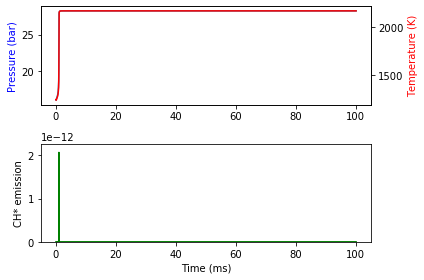

At 1250.0 K 16 bar, ignition delay time is 0.9830509012885842 ms


In [19]:
get_ignition_delay_air_n2(1000/.8, 16, 1, plot=True)
plt.rcParams['figure.figsize'] = [10, 8]


# Figure 14 ignition delay times from LLNL for iso-octane in N2 as bath gas comparing to the Dagaut et al 2014 

In [20]:
LLNL_temperatures = 1000/np.linspace(0.70,1.6,15)
pressures_bar = 16
phi = 1

LLNL_results = dict()
times = []
for T in LLNL_temperatures:
    t = get_ignition_delay_air_n2(T,pressures_bar, phi, plot=False)
    times.append(t)
    LLNL_results[pressures_bar] = times

Reached end time 102.04 ms in 3118 steps
At 1428.5714285714287 K 16 bar, ignition delay time is 0.19400338315591503 ms
Reached end time 105.37 ms in 3144 steps
At 1308.4112149532712 K 16 bar, ignition delay time is 0.6095751364559909 ms
Reached end time 101.35 ms in 3231 steps
At 1206.896551724138 K 16 bar, ignition delay time is 1.3769798954699703 ms
Reached end time 100.43 ms in 3322 steps
At 1120.0 K 16 bar, ignition delay time is 3.0837628385410545 ms
Reached end time 101.32 ms in 3439 steps
At 1044.7761194029852 K 16 bar, ignition delay time is 7.476224832830604 ms
Reached end time 101.61 ms in 3406 steps
At 979.0209790209791 K 16 bar, ignition delay time is 14.757501739086182 ms
Reached end time 101.47 ms in 3621 steps
At 921.0526315789473 K 16 bar, ignition delay time is 29.370524748284016 ms
Reached end time 100.16 ms in 3912 steps
At 869.5652173913044 K 16 bar, ignition delay time is 75.96537230375985 ms
Reached end time 100.07 ms in 442 steps
At 823.5294117647057 K 16 bar, no

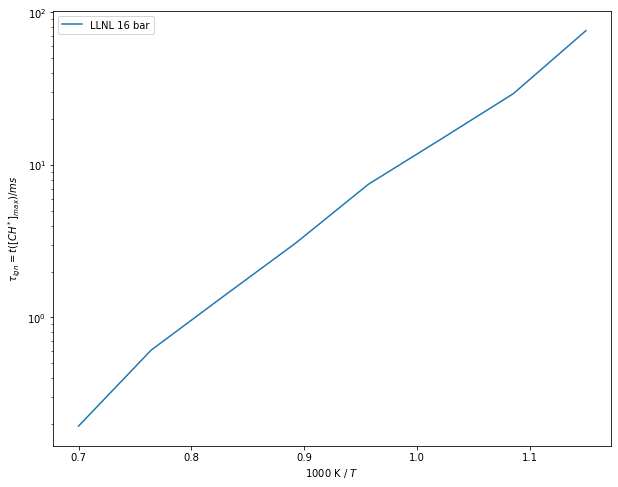

In [21]:
plt.semilogy(1000/LLNL_temperatures,LLNL_results[pressures_bar],label='LLNL {} bar'.format(pressures_bar))
plt.legend(loc='best')
plt.xlabel('1000 K / $T$')
plt.ylabel('$\\tau_{ign} = t([CH^*]_{max})/ms$')
plt.rcParams['figure.figsize'] = [10, 8]


In [ ]:
import pickle 

with open('ic8-RMG_moving_wall.pkl','rb') as fp:
    (RMG_temperatures, times) = pickle.load(fp)

In [22]:
import pickle
with open('ic8-LLNL.pkl','wb') as fp:
    pickle.dump((LLNL_temperatures, LLNL_results), fp)

In [23]:
filename = 'ic8-LLNL'
outfile = open(filename, 'wb')
pickle.dump(LLNL_results,outfile)
outfile.close()

In [ ]:
# extracted values of predicted ignition delay for iso-octane in Fig.14 
# using the docstrings
predict_ic8 = """0.657614                 0.0438935
0.660053                 0.0508193
0.668666                 0.0605986
0.674810                 0.0712038
0.682193                 0.0824521
0.690803                 0.0997690
0.695710                 0.117224
0.705556                 0.141850
0.712933                 0.169140
0.722793                 0.193028
0.730166                 0.233559
0.740019                 0.274467
0.748628                 0.332111
0.759721                 0.384622
0.765868                 0.445364
0.775710                 0.546873
0.786810                 0.615061
0.799138                 0.712339
0.806515                 0.849383
0.818843                 0.983721
0.829936                 1.13926
0.843501                 1.31950
0.852120                 1.52800
0.864449                 1.76967
0.878014                 2.04964
0.889110                 2.33921
0.900212                 2.59264
0.910061                 3.09168
0.927338                 3.52918
0.935965                 3.96890
0.942116                 4.52889
0.958153                 5.24581
0.969245                 6.07524
0.985293                 6.73451
0.993909                 7.91373
1.00872                  8.90155
1.02476                  9.86753
1.03338                  11.4268
1.04572                  12.8521
1.06423                  14.6714
1.07409                  16.9904
1.08520                  18.5574
1.10124                  21.1825
1.11357                  23.4784
1.12466                  27.5917
1.13824                  30.1389
1.14933                  35.4191
1.16290                  39.8386
1.17523                  46.1394
1.18633                  51.8925
1.19865                  61.8858
1.20728                  68.5850
1.21961                  80.6040
1.23070                  94.7255
"""

ign_times = []
temps = []

for k in predict_ic8.splitlines():
    temp, ign_time = k.split()
    temps.append(float(temp))
    ign_times.append(float(ign_time))
    
ign_times = np.array(ign_times)
temps = np.array(temps)
#print(temps, ign_times)

In [ ]:
experiment_ic8 = """ 0.742197            0.129438
0.792731            0.238540
0.858775            0.582623
0.897119            1.02386
0.916046            1.35725
1.01424             4.07608
1.05446             8.48794
1.08368             10.3738
1.11478             15.2007
1.16585             24.9217
1.17410             28.0282
1.18433             30.0848
"""

exp_ign_times = []
exp_temps = []



for z in experiment_ic8.splitlines():
    exp_temp, exp_ign_time = z.split()
    exp_temps.append(float(exp_temp))
    exp_ign_times.append(float(exp_ign_time))
    
exp_ign_times = np.array(exp_ign_times)
exp_temps = np.array(exp_temps)

plt.semilogy(temps,ign_times, 'r.:')
plt.semilogy(exp_temps,exp_ign_times, 'g+')
plt.title("Dagaut's Figure 14, iso-octane")

In [ ]:
plt.semilogy(1000/LLNL_temperatures,LLNL_results[pressures_bar],label='LLNL {} bar'.format(pressures_bar))

#plt.semilogy(1000/RMG_temperatures,RMG_results[pressures_bar],label='RMG plots no moving wall {}bar'.format(pressures_bar))

plt.semilogy(1000/RMG_temperatures,times,label='RMG moving wall plots {} bar'.format(pressures_bar))

plt.semilogy(temps,ign_times, 'r.:', label='Dagaut et al. Prediction Fig.14'.format(pressures_bar))

plt.semilogy(exp_temps,exp_ign_times, 'g+',label='Experimental values {} bar'.format(pressures_bar))

plt.legend(loc='best')
plt.xlabel('1000 K / $T$')
plt.ylabel('$\\tau_{ign} = t([CH^*]_{max})/ms$')
plt.rcParams['figure.figsize'] = [10, 8]
plt.show